# 1. Text Preprocessing

In [1]:
import re
import nltk
from nltk.corpus import stopwords
txt = ' This setence iS FOR Tex*t preproce$$ing'
print ('Original - ',txt)
txt = txt.lower()
txt = re.sub(r'[^a-zA-Z\s]','',txt)
print('Preprocessed - ',txt)
sw=set(stopwords.words('english'))
tkns = txt.split()
txt = ' '.join(word for word in tkns if word not in sw)
print('Final after removing stop words - ',txt)

Original -   This setence iS FOR Tex*t preproce$$ing
Preprocessed -   this setence is for text preproceing
Final after removing stop words -  setence text preproceing


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter

txt = ' This setence iS FOR Tex*t preproce$$ing'
print('Original - ', txt)

txt = txt.lower()  # Convert to lowercase
txt = re.sub(r'[^a-zA-Z\s]', '', txt)  # Remove non-alphabetic characters
print('Preprocessed - ', txt)

sw = set(stopwords.words('english'))
tkns = txt.split()
txt_filtered = ' '.join(word for word in tkns if word not in sw)
print('Final after removing stop words - ', txt_filtered)

word_counts = Counter(txt_filtered.split())
print('Word Frequency Distribution:')
for word, freq in word_counts.items():
    print(f"{word}: {freq}")


Original -   This setence iS FOR Tex*t preproce$$ing
Preprocessed -   this setence is for text preproceing
Final after removing stop words -  setence text preproceing
Word Frequency Distribution:
setence: 1
text: 1
preproceing: 1


# 2. Tokenization and Stemming

In [2]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
txt = 'Hello there , I am currently typing'
tok = word_tokenize(txt)
print(tok)
stemmer=PorterStemmer()
stm = [stemmer.stem(tk) for tk in tok]
fin_sen = ' '.join(stm)
print(fin_sen)

['Hello', 'there', ',', 'I', 'am', 'currently', 'typing']
hello there , i am current type


# 3.Lemmatization

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemm = WordNetLemmatizer()
txt = 'Hello there , I am currently typing'
tok = word_tokenize(txt)
lm = [lemm.lemmatize(tk) for tk in tok]
lm


['Hello', 'there', ',', 'I', 'am', 'currently', 'typing']

# 4.Part of Speech Tagging


In [23]:
from nltk.tokenize import word_tokenize
txt = 'This text is for pos tagging'
tkns = word_tokenize(txt)
tags = nltk.pos_tag(tkns)
print(tags)
print('- - - - - - '*7)
txt = ['This text is for pos tagging', 'New sentence for thiss']
tags = [nltk.pos_tag(word_tokenize(sentence)) for sentence in txt]
tags

[('This', 'DT'), ('text', 'NN'), ('is', 'VBZ'), ('for', 'IN'), ('pos', 'NN'), ('tagging', 'NN')]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


[[('This', 'DT'),
  ('text', 'NN'),
  ('is', 'VBZ'),
  ('for', 'IN'),
  ('pos', 'NN'),
  ('tagging', 'NN')],
 [('New', 'NNP'), ('sentence', 'NN'), ('for', 'IN'), ('thiss', 'NN')]]

# 5.Word Cloud

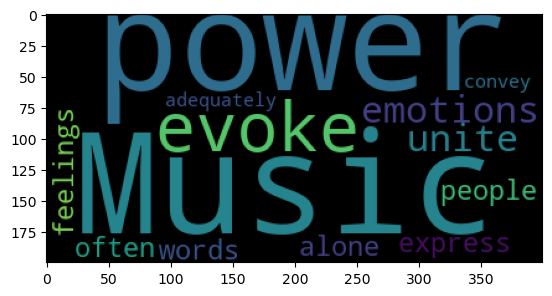

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
txt = "Music has the power to evoke emotions, unite people, and express feelings that words alone often cannot adequately convey."
wc = WordCloud().generate(txt)
plt.imshow(wc)

# 6.Emojification and Demojification

In [6]:
from emoji import demojize,emojize
txt = 'I love jordans'
emo = emojize(txt+" :red_heart: ", variant="emoji_type")
print('With Emoji- ',emo)
demo = demojize(emo)
print('Without Emoji- ',demo)


With Emoji-  I love jordans ❤️ 
Without Emoji-  I love jordans :red_heart: 


# 7.Sentiment Analysis

In [7]:
from textblob import TextBlob
txt1 = "The constant negativity and criticism from others can diminish self-esteem, create anxiety, and lead to feelings of isolation and despair."
txt2="Embracing kindness and gratitude can uplift our spirits, strengthen relationships, and create a brighter, more harmonious world for everyone."
tb1=TextBlob(txt1)
tb2=TextBlob(txt2)
print(tb1.sentiment)
print(tb2.sentiment)


Sentiment(polarity=0.0, subjectivity=0.3333333333333333)
Sentiment(polarity=0.5, subjectivity=0.5)


In [8]:
from afinn import Afinn
af = Afinn()
txt1 = "The constant negativity and criticism from others can diminish self-esteem, create anxiety, and lead to feelings of isolation and despair."
txt2="Embracing kindness and gratitude can uplift our spirits, strengthen relationships, and create a brighter, more harmonious world for everyone."
tb1=af.score(txt1)
tb2=af.score(txt2)
print(tb1)
print(tb2)

-7.0
6.0


Transformers for Sentiment Analysis

In [9]:
from transformers import pipeline
sa = pipeline("sentiment-analysis")
txt1 = "The constant negativity and criticism from others can diminish self-esteem, create anxiety, and lead to feelings of isolation and despair."
txt2="Embracing kindness and gratitude can uplift our spirits, strengthen relationships, and create a brighter, more harmonious world for everyone."
tb1=sa(txt1)
tb2=sa(txt2)
print(tb1)
print(tb2)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\athar\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'NEGATIVE', 'score': 0.9965742826461792}]
[{'label': 'POSITIVE', 'score': 0.9998712539672852}]


# 8.Named Entity Recognition

In [10]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = "Apple is looking at buying U.K. startup for $1 billion."
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.label_)


Apple ORG
U.K. GPE
$1 billion MONEY


# 9.Similarity

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")
word1 = nlp("king is the hero")
word2 = nlp("queen is the hero")
sim=word1.similarity(word2)
sim

C:\Users\athar\AppData\Local\Temp\ipykernel_12000\2361067150.py:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  sim=word1.similarity(word2)


0.9318705654495244

In [29]:
import spacy
import numpy as np

nlp = spacy.load("en_core_web_md") 
doc1 = nlp("king is the hero")
doc2 = nlp("queen is the hero")
vector1 = doc1.vector
vector2 = doc2.vector
cosine_sim = vector1.dot(vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
print("Cosine Similarity:", cosine_sim)


Cosine Similarity: 0.96332


# 10.Grammar Checking

In [2]:
import language_tool_python

tool = language_tool_python.LanguageTool('en-US')
text = "She go to the market. They is playing in the park."
corrected_text = tool.correct(text)

# Print the corrected sentence
print("Corrected Sentence:")
print(corrected_text)


Corrected Sentence:
She goes to the market. They are playing in the park.


# 11.N-Grams

In [13]:
from nltk import ngrams
text = "Apple is looking at buying U.K. startup for $1 billion."
tok = word_tokenize(text)
bg = list(ngrams(tok,2))
bg

[('Apple', 'is'),
 ('is', 'looking'),
 ('looking', 'at'),
 ('at', 'buying'),
 ('buying', 'U.K.'),
 ('U.K.', 'startup'),
 ('startup', 'for'),
 ('for', '$'),
 ('$', '1'),
 ('1', 'billion'),
 ('billion', '.')]

Transformers for Named Entity Recognition

In [14]:
from transformers import pipeline
ng = pipeline("ner")
text = "Apple is looking at buying U.K. startup for $1 billion."
ng(text)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\Users\athar\anaconda3\Lib\sit

[{'entity': 'I-ORG',
  'score': 0.9990897,
  'index': 1,
  'word': 'Apple',
  'start': 0,
  'end': 5},
 {'entity': 'I-LOC',
  'score': 0.999718,
  'index': 6,
  'word': 'U',
  'start': 27,
  'end': 28},
 {'entity': 'I-LOC',
  'score': 0.9987226,
  'index': 8,
  'word': 'K',
  'start': 29,
  'end': 30}]

# 12.Fuzzy Matching

In [15]:
from fuzzywuzzy import fuzz
string1 = "Hello there world!"
string2 = "Hello World!"
similarity = fuzz.ratio(string1, string2)
print(similarity)


73


C:\Users\athar\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# 13.Spam Detection

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample data (more balanced and larger dataset)
texts = [
    "Congratulations, you've won a free ticket!",
    "Meeting scheduled at 10 AM tomorrow.",
    "You have won a $1000 gift card, claim now!",
    "Let's catch up over coffee this weekend.",
    "Exclusive offer! Buy one, get one free.",
    "Reminder: Your appointment is scheduled for 2 PM.",
    "Urgent: Your account has been compromised.",
    "Are you available for a quick call tomorrow?",
    "This is your last chance to claim your prize.",
    "The report is due tomorrow, please review."
]
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  


vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)


model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Spam Detection Accuracy: {accuracy * 100:.2f}%")


new_text = "Win a free iPhone now!"
new_X = vectorizer.transform([new_text])  
prediction = model.predict(new_X)
print(new_text,',is detected as :- ')
if prediction[0]==1:
    print('Spam')
else:
    print('Not Spam')
#print(new_text, "is classified as", "Spam" if prediction[0] == 1 else "Not Spam")


Spam Detection Accuracy: 66.67%
Win a free iPhone now! ,is detected as :- 
Spam


# 14.Topic Modelling

In [17]:
import re
import nltk
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords', quiet=True)

# Sample documents
documents = [
    "Natural Language Processing with Python is fun.",
    "LDA is used for topic modeling.",
    "Gensim is a library for topic modeling.",
    "Python is great for machine learning.",
    "Text analysis can reveal hidden patterns."
]

# Preprocess the text: lowercase, remove non-alphabetic characters, and stopwords
stop_words = set(stopwords.words('english'))
processed_docs = [
    [word for word in re.sub(r'\W', ' ', doc).lower().split() if word not in stop_words]
    for doc in documents
]

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Apply LDA model to find topics
num_topics = 2
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Print the topics with the top words
for idx, topic in lda_model.print_topics(num_words=4):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.141*"modeling" + 0.141*"topic" + 0.085*"library" + 0.085*"used"
Topic 1: 0.107*"python" + 0.064*"language" + 0.064*"natural" + 0.064*"processing"


In [ ]:
# TRANS

In [2]:
from transformers import pipeline

classifier = pipeline("text-classification")
text = "I love using Hugging Face Transformers!"
result = classifier(text)
print("Text Classification Result:", result)

C:\Users\athar\anaconda3\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\athar\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Text Classification Result: [{'label': 'POSITIVE', 'score': 0.9971315860748291}]


In [ ]:
translator = pipeline("translation_en_to_fr")
text = "Hello, how are you?"
translated = translator(text)
print("Translated Text:", translated)


In [ ]:
# 3.Text Summarization
from transformers import pipeline
summarizer = pipeline("summarization")

text = """The Hugging Face Transformers library provides easy access to many pre-trained models. 
It supports tasks like text classification, named entity recognition, and text generation, making it a versatile tool for NLP."""

summary = summarizer(text, max_length=30, min_length=10, do_sample=False)
print("Summary:", summary)


In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
prompt = "Once upon a time"

generated_text = generator(prompt, max_length=50, num_return_sequences=1)
print("Generated Text:", generated_text[0]['generated_text'])